## Importowanie potrzebnych bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

## Zdefiniowanie funkcji celu

In [2]:
def sphere_function(x, y):
    """Funkcja celu - sfera"""
    return x**2 + y**2

def rastrigin_function(x, y):
    """Funkcja celu - Rastrigin"""
    return 20 + x**2 - 10 * np.cos(2 * np.pi * x) + y**2 - 10 * np.cos(2 * np.pi * y)

## Zaimplementowanie klasy odpowiadającej za tworzenie cząsteczek roju

In [3]:
class Particle:
    def __init__(self):
        self.position = np.random.uniform(-10, 10, 2)
        self.velocity = np.random.uniform(-1, 1, 2)
        self.best_position = self.position
        self.best_score = sphere_function(*self.position)

    def update_velocity(self, global_best_position, inertia_weight, cognitive_weight, social_weight):
        r1 = np.random.rand(2)
        r2 = np.random.rand(2)

        cognitive_component = cognitive_weight * r1 * (self.best_position - self.position)
        social_component = social_weight * r2 * (global_best_position - self.position)
        self.velocity = inertia_weight * self.velocity + cognitive_component + social_component

    def update_position(self):
        self.position += self.velocity
        self.position = np.clip(self.position, -10, 10)
        current_score = sphere_function(*self.position)
        if current_score < self.best_score:
            self.best_position = self.position
            self.best_score = current_score

## Funkcja odpowiadająca za wykonanie algorytmu PSO

In [13]:
def particle_swarm_optimization(fitness_function, num_particles, max_iterations):
    swarm = [Particle() for _ in range(num_particles)]
    global_best_position = swarm[0].position  # Inicjalizacja globalnej najlepszej pozycji
    global_best_score = fitness_function(*global_best_position)

    positions = []  # Lista pozycji cząstek w każdej iteracji
    fitness_value_swarm = [] # Lista wartości funkcji fitness w każdej iteracji dla populacji
    avr_fitness_value = [] # Lista wartości średniej wartości funkcji fitness dla cząsteczek

    for _ in range(max_iterations):
        iteration_positions = []  # Pozycje cząstek w bieżącej iteracji
        sum_fitness_value = 0
        for particle in swarm:
            particle.update_velocity(global_best_position, 0.5, 0.8, 0.8)
            particle.update_position()
            if particle.best_score < global_best_score:
                global_best_position = particle.best_position
                global_best_score = particle.best_score
            sum_fitness_value += global_best_score
            iteration_positions.append(particle.position)
        positions.append(iteration_positions)
        avr_fitness_value.append(sum_fitness_value/len(swarm))
        fitness_value_swarm.append(global_best_score)

    return global_best_position, global_best_score, positions, fitness_value_swarm, avr_fitness_value

## Wywoływanie algorytmu PSO wraz z odpowiednimi parametrami (MAIN)

In [14]:
# Wywołanie algorytmu PSO dla funkcji sferycznej 
best_position, best_score, positions, fitness_value_swarm, avr_fitness_value = particle_swarm_optimization(sphere_function, num_particles=50, max_iterations=100)

# Wywołanie algorytmu PSO dla funkcji rastrigin
best_position_r, best_score_r, positions_r, fitness_value_r_swarm, avr_fitness_value_r = particle_swarm_optimization(rastrigin_function, num_particles=50, max_iterations=100)

## Tworzenie animacji wykresu ruchu cząstek dla funkcji sferycznej

In [6]:
# # Tworzenie siatki punktów dla wykresu funkcji sferycznej
# x = np.linspace(-10, 10, 100)
# y = np.linspace(-10, 10, 100)
# X, Y = np.meshgrid(x, y)
# Z = sphere_function(X, Y)

# # Inicjalizacja wykresu dla funkcji sferycznej
# fig_sphere = plt.figure(figsize=(8, 6))
# ax_sphere = fig_sphere.add_subplot(111, projection='3d')

# def animate_sphere(i):
#     ax_sphere.clear()
#     ax_sphere.set_title(f'Iteracja {i+1} - Funkcja sferyczna')
#     ax_sphere.set_xlim(-10, 10)
#     ax_sphere.set_ylim(-10, 10)
#     ax_sphere.set_zlim(0, 200)
#     ax_sphere.set_xlabel('X')
#     ax_sphere.set_ylabel('Y')
#     ax_sphere.set_zlabel('Wartość funkcji')
#     ax_sphere.scatter([p[0] for p in positions[i]], [p[1] for p in positions[i]],
#                   [sphere_function(*p) for p in positions[i]], color='b', s=40, alpha=1.0)
#     ax_sphere.scatter(best_position[0], best_position[1], best_score, color='r', marker='*', s=200, label='Najlepsza pozycja')
#     ax_sphere.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)  # Wyświetlanie funkcji sferycznej
#     ax_sphere.legend()

# ani_sphere = FuncAnimation(fig_sphere, animate_sphere, frames=len(positions), interval=600)
# ani_sphere.save('animation_sphere.mp4', writer='ffmpeg', dpi=100)

## Tworzenie animacji wykresu ruchu cząstek dla funkcji rastrigin

In [7]:
# # Tworzenie siatki punktów dla wykresu funkcji rastrigin
# x_r = np.linspace(-5.12, 5.12, 100)
# y_r = np.linspace(-5.12, 5.12, 100)
# X_r, Y_r = np.meshgrid(x_r, y_r)
# Z_r = rastrigin_function(X_r, Y_r)

# # Inicjalizacja wykresu dla funkcji rastrigin
# fig_rastrigin = plt.figure(figsize=(8, 6))
# ax_rastrigin = fig_rastrigin.add_subplot(111, projection='3d')

# def animate_rastrigin(i):
#     ax_rastrigin.clear()
#     ax_rastrigin.set_title(f'Iteracja {i+1} - Funkcja rastrigin')
#     ax_rastrigin.set_xlim(-5.12, 5.12)
#     ax_rastrigin.set_ylim(-5.12, 5.12)
#     ax_rastrigin.set_zlim(0, 200)
#     ax_rastrigin.set_xlabel('X')
#     ax_rastrigin.set_ylabel('Y')
#     ax_rastrigin.set_zlabel('Wartość funkcji')
#     ax_rastrigin.scatter([p[0] for p in positions_r[i]], [p[1] for p in positions_r[i]],
#                      [rastrigin_function(*p) for p in positions_r[i]], color='r', s=40, alpha=1.0)
#     ax_rastrigin.scatter(best_position_r[0], best_position_r[1], best_score_r, color='m', marker='*', s=200, label='Najlepsza pozycja (Rastrigin)')
#     ax_rastrigin.plot_surface(X_r, Y_r, Z_r, cmap='viridis', alpha=0.5)  # Wyświetlanie funkcji rastrigin
#     ax_rastrigin.legend()

# ani_rastrigin = FuncAnimation(fig_rastrigin, animate_rastrigin, frames=len(positions_r), interval=600)
# ani_rastrigin.save('animation_rastrigin.mp4', writer='ffmpeg', dpi=100)

## Tworzenie animacji wykresu ruchu cząstek dla funkcji sferycznej w wersji 2D

In [8]:
# # Inicjalizacja wykresu dla funkcji sferycznej
# fig_sphere = plt.figure(figsize=(8, 6))
# ax_sphere = fig_sphere.add_subplot(111)

# def animate_sphere(i):
#     ax_sphere.clear()
#     ax_sphere.set_title(f'Iteracja {i+1} - Funkcja sferyczna')
#     ax_sphere.set_xlim(-10, 10)
#     ax_sphere.set_ylim(-10, 10)
#     ax_sphere.set_xlabel('X')
#     ax_sphere.set_ylabel('Y')
#     ax_sphere.scatter([p[0] for p in positions[i]], [p[1] for p in positions[i]], color='b', marker='o')
#     ax_sphere.scatter(best_position[0], best_position[1], color='r', marker='*', s=200, label='Najlepsza pozycja')
#     ax_sphere.contourf(X, Y, Z, levels=100, cmap='viridis', alpha=0.5)  # Wyświetlanie funkcji sferycznej
#     ax_sphere.legend()

# ani_sphere = FuncAnimation(fig_sphere, animate_sphere, frames=len(positions), interval=600)
# ani_sphere.save('animation_sphere_top.mp4', writer='ffmpeg', dpi=100)

## Tworzenie animacji wykresu ruchu cząstek dla funkcji rastrigin w wersji 2D

In [9]:
# # Tworzenie siatki punktów dla wykresu funkcji rastrigin
# x_r = np.linspace(-5.12, 5.12, 100)
# y_r = np.linspace(-5.12, 5.12, 100)
# X_r, Y_r = np.meshgrid(x_r, y_r)
# Z_r = rastrigin_function(X_r, Y_r)

# # Inicjalizacja wykresu dla funkcji rastrigin
# fig_rastrigin_top = plt.figure(figsize=(8, 6))
# ax_rastrigin_top = fig_rastrigin_top.add_subplot(111)

# def animate_rastrigin_top(i):
#     ax_rastrigin_top.clear()
#     ax_rastrigin_top.set_title(f'Iteracja {i+1} - Funkcja rastrigin')
#     ax_rastrigin_top.set_xlim(-5.12, 5.12)
#     ax_rastrigin_top.set_ylim(-5.12, 5.12)
#     ax_rastrigin_top.set_xlabel('X')
#     ax_rastrigin_top.set_ylabel('Y')
#     ax_rastrigin_top.contourf(X_r, Y_r, Z_r, levels=100, cmap='viridis', alpha=0.5)  # Wyświetlanie funkcji rastrigin
#     ax_rastrigin_top.scatter([p[0] for p in positions_r[i]], [p[1] for p in positions_r[i]], color='r', marker='o')
#     ax_rastrigin_top.scatter(best_position_r[0], best_position_r[1], color='m', marker='*', s=200, label='Najlepsza pozycja (Rastrigin)')
#     ax_rastrigin_top.legend()

# ani_rastrigin_top = FuncAnimation(fig_rastrigin_top, animate_rastrigin_top, frames=len(positions_r), interval=600)
# ani_rastrigin_top.save('animation_rastrigin_top.mp4', writer='ffmpeg', dpi=100)

## Wykres zmiany wartości funkcji fitness względem każdej iteracji dla przykładu funkcji sferycznej

MovieWriter Pillow unavailable; using Pillow instead.


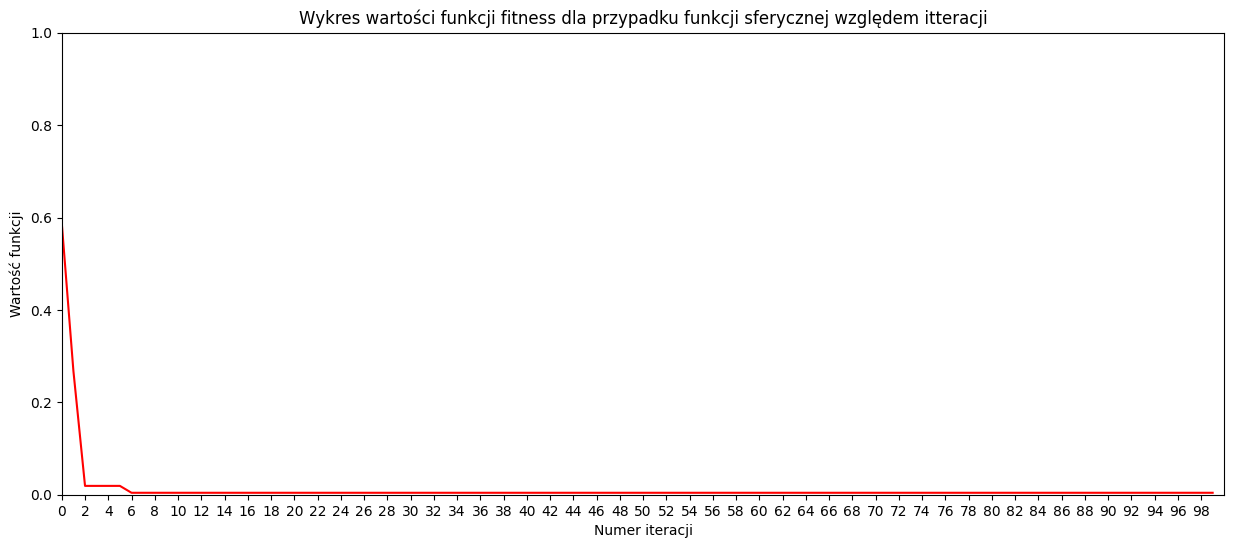

In [17]:
# Inicjalizacja wykresu dla funkcji sphere
fig_fitness_sphere = plt.figure(figsize=(15, 6))
ax_fitness_sphere = fig_fitness_sphere.add_subplot(111)

itteration = [itt for itt in range(0, len(fitness_value_swarm))]

def animate_fitness_sphere(i):
    ax_fitness_sphere.clear()
    ax_fitness_sphere.set_title('Wykres wartości funkcji fitness dla przypadku funkcji sferycznej względem itteracji')
    ax_fitness_sphere.set_xticks(np.arange(0, len(fitness_value_swarm), 2))
    ax_fitness_sphere.set_xlim(0, 100)
    ax_fitness_sphere.set_ylim(0, 1)
    ax_fitness_sphere.set_xlabel('Numer iteracji')
    ax_fitness_sphere.set_ylabel('Wartość funkcji')
    data = list(zip(itteration, fitness_value_swarm[0:i+1]))
    ax_fitness_sphere.plot(*zip(*data), color='r')

ani_fitness_sphere = FuncAnimation(fig_fitness_sphere, animate_fitness_sphere, frames=len(fitness_value_swarm), init_func=lambda: None, interval=600)
ani_fitness_sphere.save('animation_fitness_sphere.gif', writer='Pillow', dpi=100)

## Wykres zmiany wartości funkcji fitness względem każdej iteracji dla przykładu funkcji rastrigin

MovieWriter Pillow unavailable; using Pillow instead.


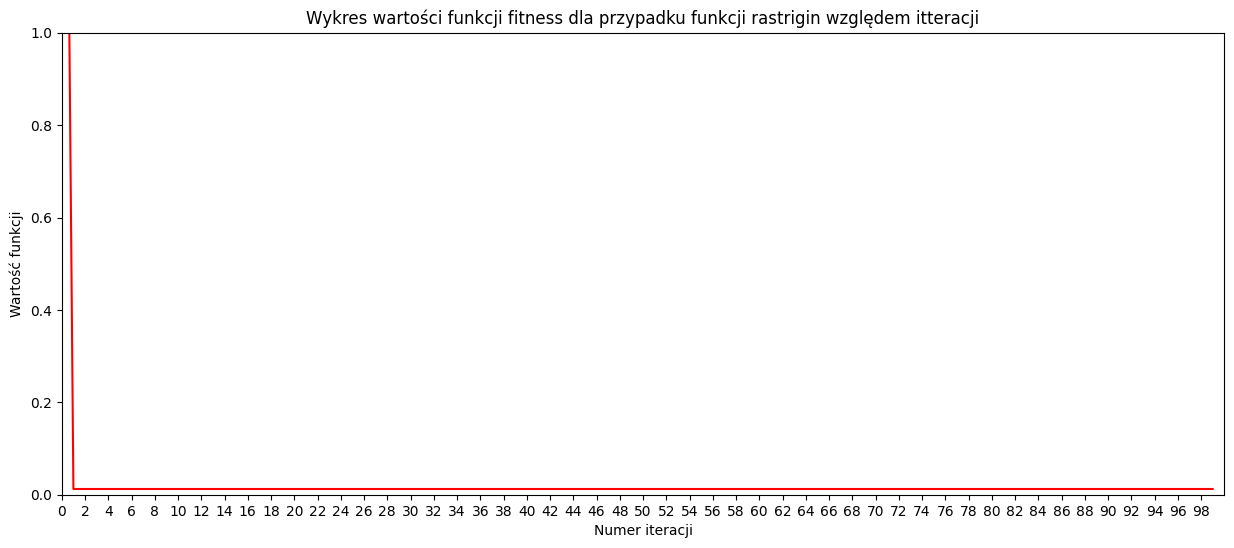

In [18]:
# Inicjalizacja wykresu dla funkcji rastrigin
fig_fitness_rastrigin = plt.figure(figsize=(15, 6))
ax_fitness_rastrigin = fig_fitness_rastrigin.add_subplot(111)

itteration = [itt for itt in range(0, len(fitness_value_r_swarm))]

def animate_fitness_rastrigin(i):
    ax_fitness_rastrigin.clear()
    ax_fitness_rastrigin.set_title('Wykres wartości funkcji fitness dla przypadku funkcji rastrigin względem itteracji')
    ax_fitness_rastrigin.set_xticks(np.arange(0, len(fitness_value_r_swarm), 2))
    ax_fitness_rastrigin.set_xlim(0,100)
    ax_fitness_rastrigin.set_ylim(0, 1)
    ax_fitness_rastrigin.set_xlabel('Numer iteracji')
    ax_fitness_rastrigin.set_ylabel('Wartość funkcji')
    # zip value to plot bcs feedback was error about diffrent shape of arrays
    data = list(zip(itteration, fitness_value_r_swarm[0:i+1]))
    ax_fitness_rastrigin.plot(*zip(*data), color='r')

ani_fitness_rastrigin = FuncAnimation(fig_fitness_rastrigin, animate_fitness_rastrigin, frames=len(fitness_value_r_swarm), init_func=lambda: None, interval=600)
ani_fitness_rastrigin.save('animation_fitness_rastrigin.gif', writer='Pillow', dpi=100)

## Wykres średniej wartości funkcji celu dla każdej cząsteczki dla funkcji sferycznej

MovieWriter Pillow unavailable; using Pillow instead.


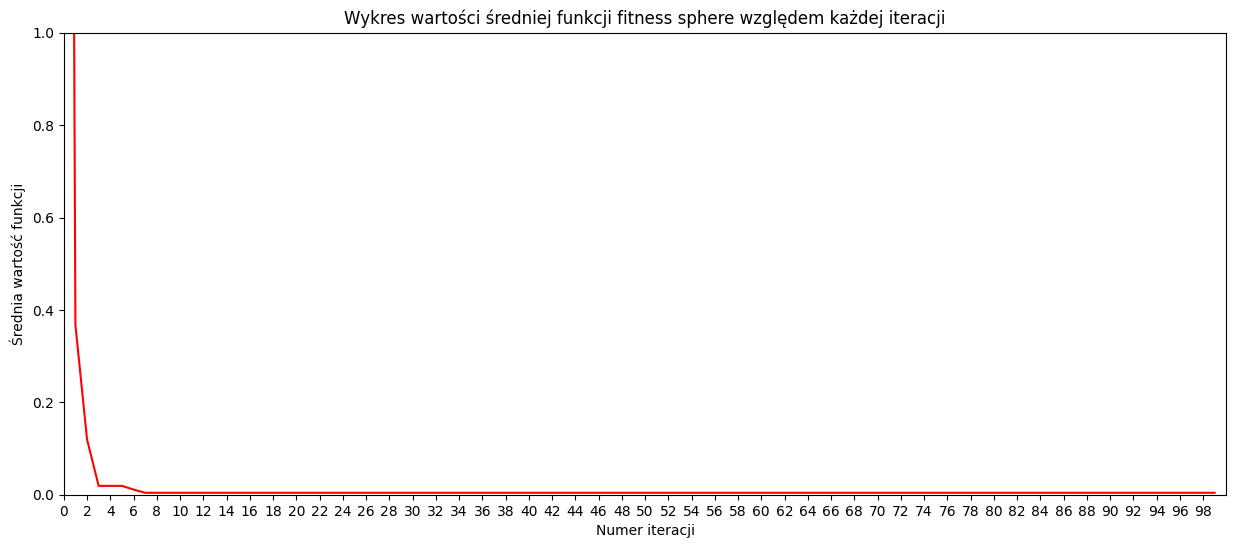

In [16]:
# Inicjalizacja wykresu dla funkcji sphere
fig_avr_fitness = plt.figure(figsize=(15, 6))
ax_avr_fitness = fig_avr_fitness.add_subplot(111)

itteration = [itt for itt in range(0, len(avr_fitness_value))]

# print(avr_fitness_value)

def animate_avr_fitness(i):
    ax_avr_fitness.clear()
    ax_avr_fitness.set_title('Wykres wartości średniej funkcji fitness sphere względem każdej iteracji')
    ax_avr_fitness.set_xticks(np.arange(0, len(avr_fitness_value), 2))
    ax_avr_fitness.set_xlim(0, 100)
    ax_avr_fitness.set_ylim(0, 1)
    ax_avr_fitness.set_xlabel('Numer iteracji')
    ax_avr_fitness.set_ylabel('Średnia wartość funkcji')
    data = list(zip(itteration, avr_fitness_value[0:i+1]))
    ax_avr_fitness.plot(*zip(*data), color='r')

ani_avr_fitness = FuncAnimation(fig_avr_fitness, animate_avr_fitness, frames=len(avr_fitness_value), init_func=lambda: None, interval=600)
ani_avr_fitness.save('animation_avr_fitness_sphere.gif', writer='Pillow', dpi=100)

## Wykres średniej wartości funkcji celu dla każdej cząsteczki dla funkcji rastrigin

MovieWriter Pillow unavailable; using Pillow instead.


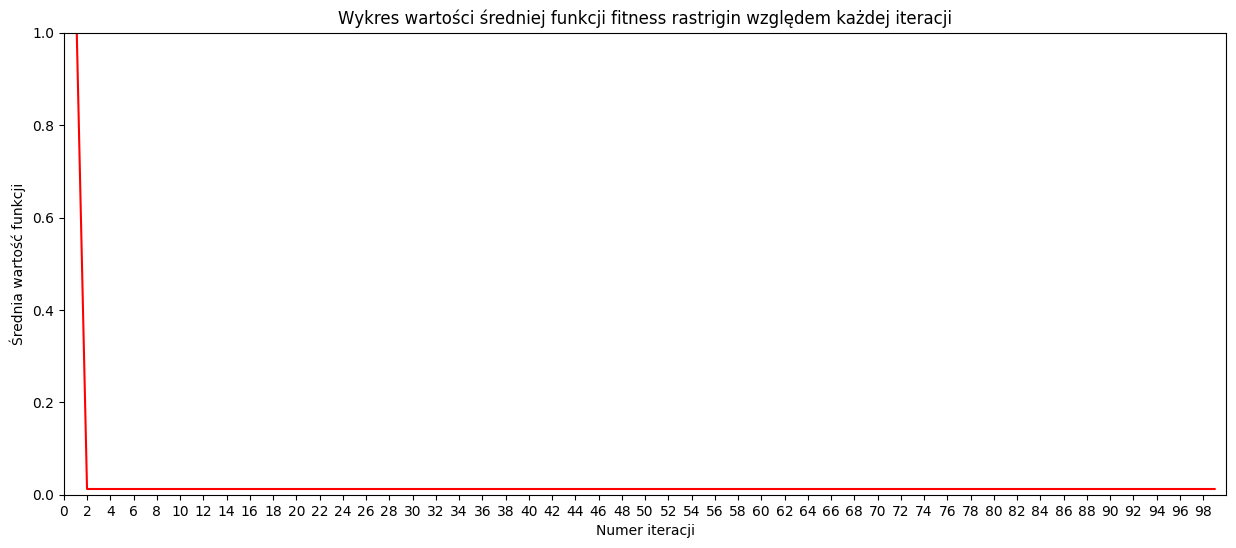

In [20]:
# Inicjalizacja wykresu dla funkcji sphere
fig_avr_fitness_r = plt.figure(figsize=(15, 6))
ax_avr_fitness_r = fig_avr_fitness_r.add_subplot(111)

itteration = [itt for itt in range(0, len(avr_fitness_value_r))]

# print(avr_fitness_value)

def animate_avr_fitness_r(i):
    ax_avr_fitness_r.clear()
    ax_avr_fitness_r.set_title('Wykres wartości średniej funkcji fitness rastrigin względem każdej iteracji')
    ax_avr_fitness_r.set_xticks(np.arange(0, len(avr_fitness_value_r), 2))
    ax_avr_fitness_r.set_xlim(0, 100)
    ax_avr_fitness_r.set_ylim(0, 1)
    ax_avr_fitness_r.set_xlabel('Numer iteracji')
    ax_avr_fitness_r.set_ylabel('Średnia wartość funkcji')
    data = list(zip(itteration, avr_fitness_value_r[0:i+1]))
    ax_avr_fitness_r.plot(*zip(*data), color='r')

ani_avr_fitness_r = FuncAnimation(fig_avr_fitness_r, animate_avr_fitness_r, frames=len(avr_fitness_value_r), init_func=lambda: None, interval=600)
ani_avr_fitness_r.save('animation_avr_fitness_rastrigin.gif', writer='Pillow', dpi=100)